In [3]:
statusBadCount = 0;import random as rand
import numpy as np
import matplotlib.pyplot as plt

In [4]:
auvRange = 20
shrimpRange = 1000
#rate = shrimpRange/auvRange
timeNoiseRange = 0.0005
distNoiseRange = (1/100)*auvRange

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

def createPositions(auvPos):
    for i in range(len(auvPos)):
        auvPos[i] = [rand.random()*auvRange, rand.random()*auvRange]
        rand1 = rand.random()*distNoiseRange 
        rand2 = rand.random()*distNoiseRange
        auvPosWN[i] = [(auvPos[i][0]+rand1),(auvPos[i][1]+rand2)]
    return auvPos,auvPosWN
auvPos,auvPosWN = createPositions(auvPos)

shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
#print(auvPos)
#print(auvPosWN)

In [5]:
diff = [[0,0],[0,0],[0,0],[0,0]]
def getDiffFromShrimp(shrimpPos, auvPos):
    for i in range(len(auvPos)):
        diff[i] = [shrimpPos[0] - auvPos[i][0],shrimpPos[1] - auvPos[i][1]];
        
    return diff

diff = getDiffFromShrimp(shrimpPos, auvPos)
#diff = getDiffFromShrimp(shrimpPos, auvPosWN)
#auvPos = auvPosWN

In [6]:
functions = []
soundSpeed = 1498
Error = 0.2;
#gets deltas in seconds
def getMags(e = 0):
    mag = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
    k = 0
    for i in range(4):
        for j in range(i+1, 4):
           # print(i,j)
            mag[k] = (np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            mag[k] = mag[k] - e/2 + rand.random()*e;
            #mag[k] = mag[k] + rand.random()*noiseRange;
            k = k+1
    return mag
#i want a for loop that prints 0,1 0,2 0,3 1,2,1,3 2,3 

timediff = getMags()
print(timediff)

[1.5807635762797645, 0.80862217934463843, 16.895710346723945, -0.77214139693512607, 15.31494677044418, 16.087088167379306]


In [7]:
def loss(s):
    error = np.zeros(6)
    k = 0
    diff = getDiffFromShrimp(s, auvPos)
    for i in range(4):
        for j in range(i+1,4):
            #print(i,j)
            error[k] = timediff[k]-(np.linalg.norm(diff[i])-np.linalg.norm(diff[j]))
            k = k+1
    return error

In [8]:
from scipy.optimize import least_squares
#shrimp location estimate
initial_estimates=shrimpPos
res = least_squares(loss, initial_estimates)
print(res.x)
print(shrimpPos)

[ 527.79378752  688.10436698]
[527.7937875158088, 688.1043669757553]


In [9]:
res.cost
#angle
print(np.arctan(res.x[1]/res.x[0]))
print(np.arctan(shrimpPos[1]/shrimpPos[0]))


0.916487469224
0.916487469224


In [10]:
auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

2


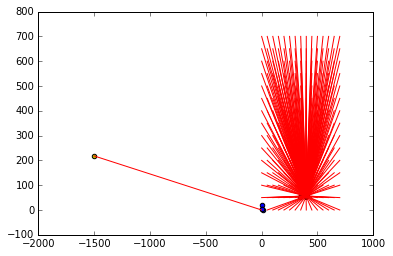

-0.230334100855 (50.468090668955995, 5.723111503565292)
[ 398.24256922   56.4211067 ]
[347.7744785541614, 50.697995192146905]


[1.0725730361900399,
 -5.7673396582273577,
 -2.9746892435907011,
 -6.9404732181331816,
 -3.9844667668455314,
 2.9956677924207114]

In [11]:

results = []
initial_est = []

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags(0.2)
for i in range(15):
    for j in range(15):
        #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
        initial_estimates = [i * 50, j * 50];
        initial_est.append(initial_estimates)
        result = (least_squares(loss, initial_estimates, bounds=[-1500,1500]))
        plt.plot([initial_estimates[0],result.x[0]], [initial_estimates[1], result.x[1]],c='r')
        plt.scatter(result.x[0], result.x[1], c='y')
        results.append(list(result.x))


angleguess = np.arctan(result.x[1]/result.x[0])
real = np.arctan(shrimpPos[1]/shrimpPos[0])
anglediff = (angleguess - real)*180/np.pi
posdiff = (result.x[0]-shrimpPos[0], result.x[1]-shrimpPos[1])

#plt.plot([0,res.x[0]], [0, res.x[1]], marker = 'o',c='b')
plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
#plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
x,y = zip(*auvPos)

plt.scatter(x,y)
#plt.scatter(shrimpPos[0], shrimpPos[1])
#plt.scatter(res.x[0], res.x[1], c='g')
print(result.status)
plt.show()
print(anglediff, posdiff)
#print(results)
print(result.x)
print(shrimpPos)

timediff

In [12]:
np.linalg.norm(posdiff)

50.791556198370259

In [13]:
#According to the least squares algorithm, convergence always occurs, but result is inaccurate

auvPos = [[0,0],[0,0],[0,0],[0,0]]
print(anglediff, posdiff)
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]

auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

-0.230334100855 (50.468090668955995, 5.723111503565292)


In [14]:

auvPos = [[0,0],[0,0],[0,0],[0,0]]
auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
auvPos,auvPosWN = createPositions(auvPos)
shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
diff = getDiffFromShrimp(shrimpPos, auvPos)
timediff = getMags()

In [15]:
init_guess = [0,0]
plt.scatter(result.x[0], result.x[1], c='y')
result1 = least_squares(loss, init_guess)
result2 = least_squares(loss, [30,30])
print(result1)
print(result2)

 active_mask: array([ 0.,  0.])
        cost: 2.1556327101980788
         fun: array([ 0.40816837, -1.01598274, -0.25602288, -1.42415111, -0.66419124,
        0.75995986])
        grad: array([ -1.51804644e-06,  -4.96367453e-07])
         jac: array([[ 0.38669095,  0.02117983],
       [ 0.32422367,  0.0073689 ],
       [-0.450325  ,  0.18280321],
       [-0.06246728, -0.01381093],
       [-0.83701595,  0.16162338],
       [-0.77454867,  0.17543431]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 9
        njev: 9
  optimality: 1.5180464411346239e-06
      status: 2
     success: True
           x: array([ 7.90743674, -6.16987874])
 active_mask: array([ 0.,  0.])
        cost: 7.3304161303472985e-12
         fun: array([  2.36264680e-06,   1.30896740e-06,   2.29674674e-06,
        -1.05367940e-06,  -6.59000534e-08,   9.87779345e-07])
        grad: array([ -3.62368911e-09,   3.44810566e-09])
         jac: array([[ 0.00724211, -0.00817268],
       [ 0.0053362 , 

In [16]:
loss(init_guess)

array([-3.71462437, -4.45301717,  4.78312254, -0.73839279,  8.49774691,
        9.23613971])

In [17]:
print(auvPos)

[[10.79099780312172, 14.270238062104251], [1.6781984527015958, 18.268235877112193], [3.6002817268080767, 16.770080483510522], [18.712833488936155, 8.616498286951234]]


In [18]:
results = []
initial_est = []
statusOneCount = 0;
statusBadCount = 0;
BadResults = 0;
GoodResults = 0;
for k in range(100):
    auvPos = [[0,0],[0,0],[0,0],[0,0]]
    auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
    auvPos,auvPosWN = createPositions(auvPos)
    shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
    diff = getDiffFromShrimp(shrimpPos, auvPos)
    timediff = getMags()
    for i in range(15):
        for j in range(15):
            #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
            initial_estimates = [i * 50, j * 50];
            initial_est.append(initial_estimates)
            result = (least_squares(loss, initial_estimates,  bounds=[-1500,1500]))
            results.append(list(result.x))

            if(result.status == 1):
                statusOneCount = statusOneCount + 1;
                angleguess = np.arctan(result.x[1]/result.x[0])
                real = np.arctan(shrimpPos[1]/shrimpPos[0])
                anglediff = (angleguess - real)*180/np.pi
                posdiff = [result.x[0]-shrimpPos[0], result.x[1]-shrimpPos[1]]    
                if(anglediff > 0.05 or posdiff[0] > 0.05 or posdiff[1] > 0.05):
                    BadResults = BadResults + 1;
                    '''
                    plt.scatter([initial_estimates[0]], [initial_estimates[1]], c='g')
                    plt.scatter([result.x[0]], [result.x[1]], c='y')
                    plt.scatter([shrimpPos[0]], [shrimpPos[1]], marker = 'o',c='r')
                    x,y = zip(*auvPos)
                    plt.scatter(x,y)
                    plt.show();
                    '''
                else:
                    GoodResults = GoodResults + 1;
                    break;
            else:
                statusBadCount = statusBadCount + 1;
            results.append(list(result.x))
            if(result.status == 1):
                break;
        if(result.status != 1):
            statusBadCount = statusBadCount + 1;
    
print("done");

done


In [19]:
print(BadResults)
print(GoodResults)
print(statusOneCount)
print(statusBadCount)

3
1495
1498
80


In [22]:
-0.25 + rand.random()*0.5

0.03619743686199789

In [58]:
results = []
initial_est = []
statusOneCount = 0;
statusBadCount = 0;
BadResults = 0;
GoodResults = 0;
disterrors = []
angleerrors = []

for k in range(50):
    for p in range(15):
        auvPos = [[0,0],[0,0],[0,0],[0,0]]
        auvPosWN = [[0,0],[0,0],[0,0],[0,0]]
        auvPos,auvPosWN = createPositions(auvPos)
        shrimpPos = [rand.random()*shrimpRange, rand.random()*shrimpRange]
        diff = getDiffFromShrimp(shrimpPos, auvPos)
        timediff = getMags(0.0025*k)
        for i in range(15):
            for j in range(15):
                #initial_estimates = [rand.random()*shrimpRange, rand.random()*shrimpRange];
                initial_estimates = [i * 50, j * 50];
                initial_est.append(initial_estimates)
                result = (least_squares(loss, initial_estimates,  bounds=[-1500,1500]))

                if(result.status == 1):
                    statusOneCount = statusOneCount + 1;
                    angleguess = np.arctan(result.x[1]/result.x[0])
                    real = np.arctan(shrimpPos[1]/shrimpPos[0])
                    anglediff = (angleguess - real)*180/np.pi
                    posdiff = [result.x[0]-shrimpPos[0], result.x[1]-shrimpPos[1]]    
                    disterrors.append([0.0025*k, np.linalg.norm(posdiff)]);
                    angleerrors.append([0.0025*k, angleerrors]);
                    
                    break;
                   # if(anglediff < 1 or np.linalg.norm(posdiff) < 10):
                    #    break;

                    #statusBadCount = statusBadCount + 1;
            if(result.status == 1):
                    break;
        if(result.status != 1):
            statusBadCount = statusBadCount + 1;
    
print("done");

done


In [ ]:
a,b = zip(*disterrors)
c,d = zip(*angleerrors)

plt.scatter(a,b)
plt.xlabel("error size")
plt.ylabel("diff in distance")
plt.show();

plt.scatter(c,d)
plt.xlabel("error size")
plt.ylabel("diff in error")
plt.show();

In [ ]:
c,d = zip(*angleerrors)


In [26]:
print(angleerrors[40])

[0.1, [[0.0, [...]], [0.0025, [...]], [0.005, [...]], [0.0075, [...]], [0.01, [...]], [0.0125, [...]], [0.015, [...]], [0.0175, [...]], [0.02, [...]], [0.0225, [...]], [0.025, [...]], [0.0275, [...]], [0.03, [...]], [0.0325, [...]], [0.035, [...]], [0.0375, [...]], [0.04, [...]], [0.0425, [...]], [0.045, [...]], [0.0475, [...]], [0.05, [...]], [0.0525, [...]], [0.055, [...]], [0.0575, [...]], [0.06, [...]], [0.0625, [...]], [0.065, [...]], [0.0675, [...]], [0.07, [...]], [0.0725, [...]], [0.075, [...]], [0.0775, [...]], [0.08, [...]], [0.0825, [...]], [0.085, [...]], [0.08750000000000001, [...]], [0.09, [...]], [0.0925, [...]], [0.095, [...]], [0.0975, [...]], [...], [0.10250000000000001, [...]], [0.105, [...]], [0.1075, [...]], [0.11, [...]], [0.1125, [...]], [0.115, [...]], [0.11750000000000001, [...]], [0.12, [...]], [0.1225, [...]]]]


In [55]:
a = np.zeros((50, 15))
a[0][2] = 3

In [ ]:
[0] * 50


In [ ]:
a[0] = [1,2]